In [1]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("Carseats.csv")
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
X = df[["Sales","CompPrice","Income","Advertising","Population","Price","ShelveLoc","Age","Education","Urban"]].values
X[0:5]

array([[9.5, 138, 73, 11, 276, 120, 'Bad', 42, 17, 'Yes'],
       [11.22, 111, 48, 16, 260, 83, 'Good', 65, 10, 'Yes'],
       [10.06, 113, 35, 10, 269, 80, 'Medium', 59, 12, 'Yes'],
       [7.4, 117, 100, 4, 466, 97, 'Medium', 55, 14, 'Yes'],
       [4.15, 141, 64, 3, 340, 128, 'Bad', 38, 13, 'Yes']], dtype=object)

In [5]:
df["Urban"].unique()

array(['Yes', 'No'], dtype=object)

In [6]:
from sklearn.preprocessing import LabelEncoder
leb_shelveLoc = LabelEncoder()
leb_shelveLoc.fit(["Bad","Medium","Good"])
X[:,6] = leb_shelveLoc.transform(X[:,6])


leb_Urban = LabelEncoder()
leb_Urban.fit(["Yes","No"])
X[:,9] = leb_Urban.transform(X[:,9])

X[0:5]

array([[9.5, 138, 73, 11, 276, 120, 0, 42, 17, 1],
       [11.22, 111, 48, 16, 260, 83, 1, 65, 10, 1],
       [10.06, 113, 35, 10, 269, 80, 2, 59, 12, 1],
       [7.4, 117, 100, 4, 466, 97, 2, 55, 14, 1],
       [4.15, 141, 64, 3, 340, 128, 0, 38, 13, 1]], dtype=object)

In [7]:
y = df["US"]
y[:5]

0    Yes
1    Yes
2    Yes
3    Yes
4     No
Name: US, dtype: object

In [8]:
print(X.shape)
print(y.shape)

(400, 10)
(400,)


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X,y,test_size=0.2, random_state=3, stratify=y)

In [11]:
print(X_trainset.shape)
print(y_trainset.shape)

(320, 10)
(320,)


In [12]:
from sklearn.tree import DecisionTreeClassifier
carseatsModel = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
carseatsModel.fit(X_trainset, y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [13]:
predtree = carseatsModel.predict(X_testset)

In [14]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predtree))

DecisionTrees's Accuracy:  0.8875


In [15]:
from  io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree

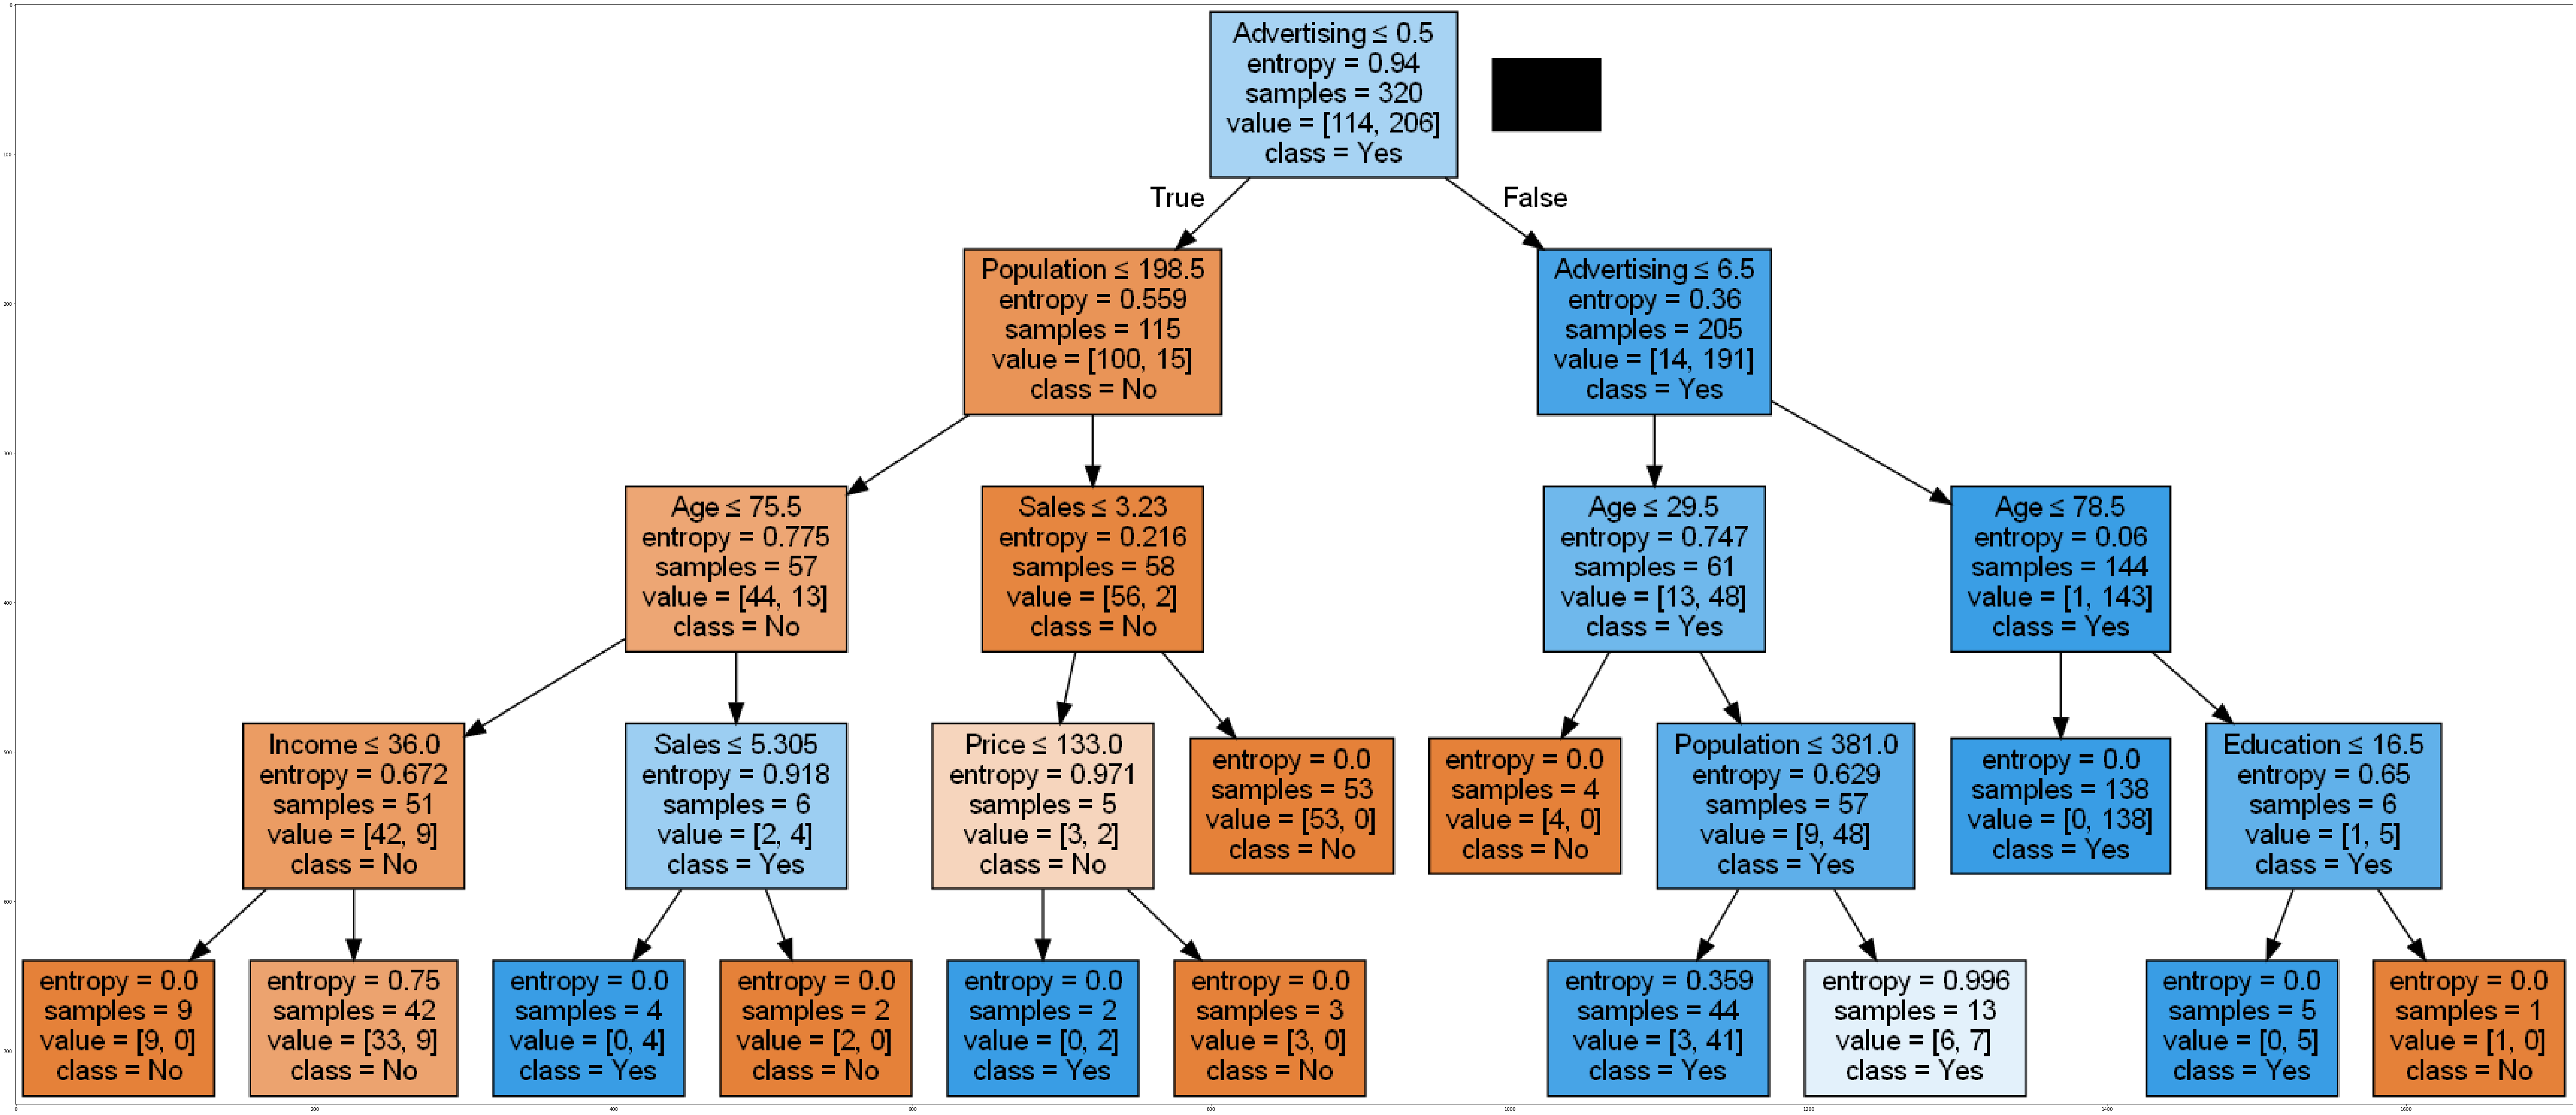

In [16]:
dot_data = StringIO()
filename = "Carseats.png"
featureNames = df.columns[0:10]
out=tree.export_graphviz(carseatsModel,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_trainset), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')